First, let's take a look at the shape of our raw data.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
raw_data = pd.read_csv("../src/raw_data.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73513 entries, 0 to 73512
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       73513 non-null  int64  
 1   Street                   59445 non-null  object 
 2   HouseNumber              57351 non-null  object 
 3   Box                      13636 non-null  object 
 4   Floor                    28628 non-null  float64
 5   City                     73513 non-null  object 
 6   PostalCode               73513 non-null  int64  
 7   Region                   73513 non-null  object 
 8   District                 73513 non-null  object 
 9   Province                 73513 non-null  object 
 10  PropertyType             73513 non-null  object 
 11  PropertySubType          73513 non-null  object 
 12  Price                    73511 non-null  float64
 13  SaleType                 73513 non-null  object 
 14  BidStylePricing       

Now, after removing duplicates, removing empty rows by Price and LivingArea, fixing formatting, setting types, and added a few calculated columns, let's see how the shape changed.

In [24]:
cleaned_data = pd.read_csv("../src/cleaned_data.csv")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59457 entries, 0 to 59456
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         59457 non-null  int64  
 1   City                       59457 non-null  object 
 2   PostalCode                 59457 non-null  int64  
 3   Region                     59457 non-null  object 
 4   District                   59457 non-null  object 
 5   Province                   59457 non-null  object 
 6   PropertyType               59457 non-null  object 
 7   PropertySubType            59457 non-null  object 
 8   Price                      59457 non-null  float64
 9   ConstructionYear           38208 non-null  float64
 10  BedroomCount               59457 non-null  int64  
 11  LivingArea                 59457 non-null  float64
 12  KitchenType                35729 non-null  object 
 13  Furnished                  59457 non-null  int

Check to see if teh data is distributed normally by Price.

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\4060158093.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=cleaned_data['Price'], kde=True, color='orange', palette=['orange'])


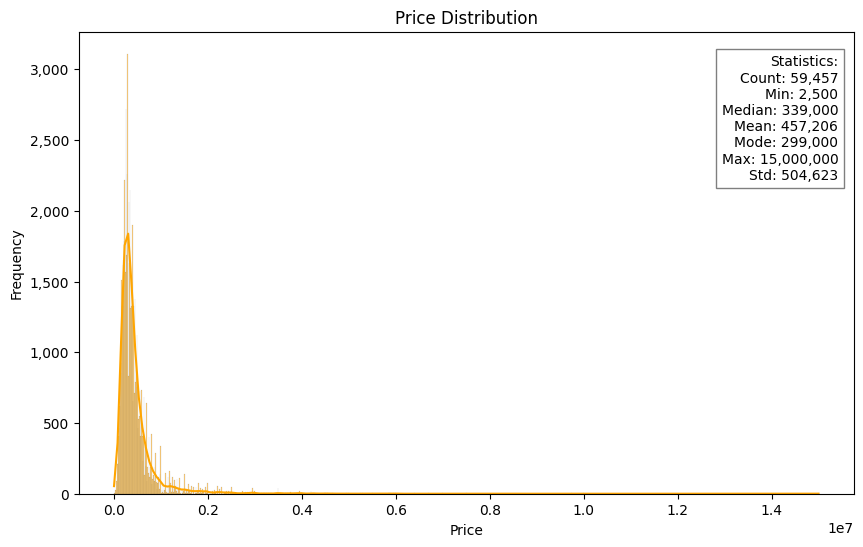

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for 'Price' column
price_min = cleaned_data['Price'].min()
price_median = cleaned_data['Price'].median()
price_mean = cleaned_data['Price'].mean()
price_mode = cleaned_data['Price'].mode()[0]
price_max = cleaned_data['Price'].max()
price_count = cleaned_data['Price'].count()
price_std = cleaned_data['Price'].std()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data['Price'], kde=True, color='orange', palette=['orange'])

# Add text box for 'Price' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_count)}\nMin: {format_number(price_min)}\nMedian: {format_number(price_median)}\nMean: {format_number(price_mean)}\nMode: {format_number(price_mode)}\nMax: {format_number(price_max)}\nStd: {format_number(price_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()


It's heavily right shifted. Can you think of a way to normalize the Price data without eliminating outliers?

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\3653126585.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=cleaned_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


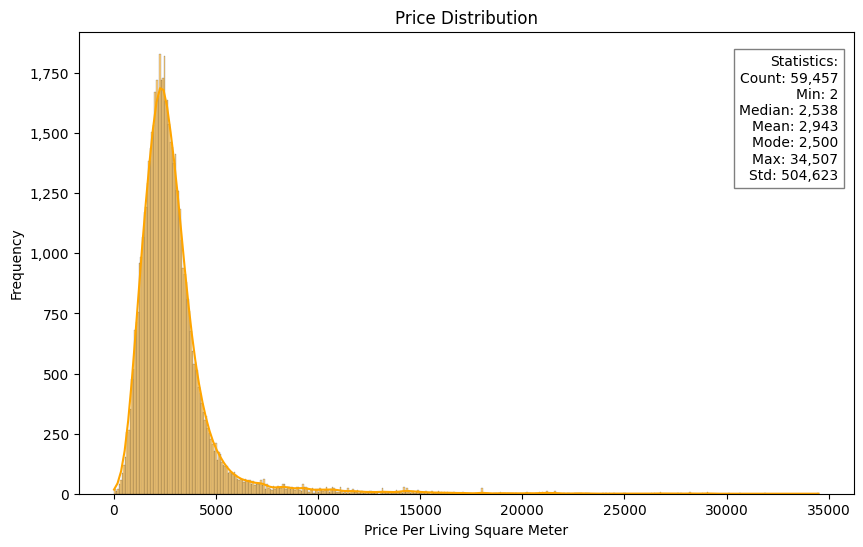

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for 'Price' column
price_min = cleaned_data['PricePerLivingSquareMeter'].min()
price_median = cleaned_data['PricePerLivingSquareMeter'].median()
price_mean = cleaned_data['PricePerLivingSquareMeter'].mean()
price_mode = cleaned_data['PricePerLivingSquareMeter'].mode()[0]
price_max = cleaned_data['PricePerLivingSquareMeter'].max()
price_count = cleaned_data['PricePerLivingSquareMeter'].count()
price_std = cleaned_data['Price'].std()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text box for 'Price' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_count)}\nMin: {format_number(price_min)}\nMedian: {format_number(price_median)}\nMean: {format_number(price_mean)}\nMode: {format_number(price_mode)}\nMax: {format_number(price_max)}\nStd: {format_number(price_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()

Using ratios is a great way to normalize data without removing outliers. However, it looks like you still might need to. Use the model_data dataframe to check distribution without outliers by pricepersquaremeter. Let's explore it's shape first.

In [28]:
model_data = pd.read_csv("../src/model_data.csv")
model_house_data = model_data[model_data['PropertyType'] == 'House']
model_apartment_data = model_data[model_data['PropertyType'] == 'Apartment']
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40391 entries, 0 to 40390
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         40391 non-null  int64  
 1   City                       40391 non-null  object 
 2   PostalCode                 40391 non-null  int64  
 3   Region                     40391 non-null  object 
 4   District                   40391 non-null  object 
 5   Province                   40391 non-null  object 
 6   PropertyType               40391 non-null  object 
 7   PropertySubType            40391 non-null  object 
 8   Price                      40391 non-null  float64
 9   ConstructionYear           26736 non-null  float64
 10  BedroomCount               40391 non-null  int64  
 11  LivingArea                 40391 non-null  float64
 12  KitchenType                25437 non-null  object 
 13  Furnished                  40391 non-null  int

Notice we removed ~19k rows. Now plot the histogram again. 

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\3419603782.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


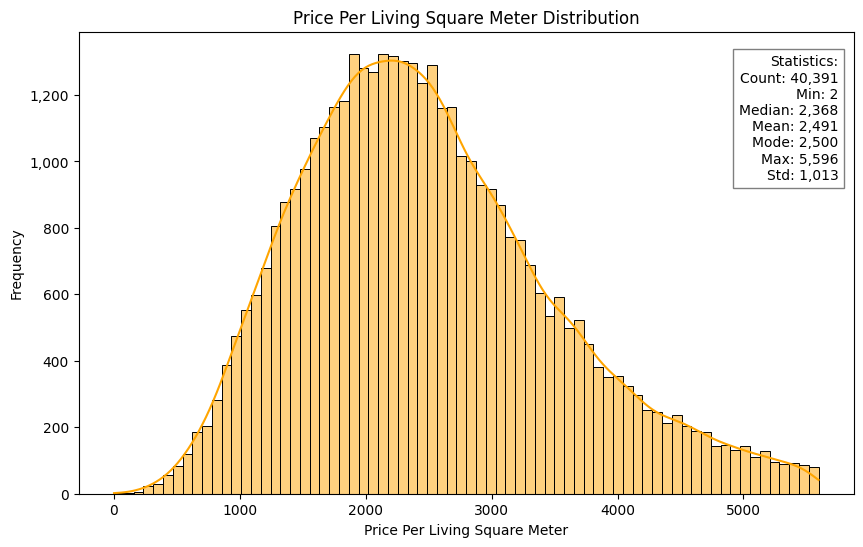

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for 'PricePerLivingSquareMeter' column
price_per_sq_meter_min = model_data['PricePerLivingSquareMeter'].min()
price_per_sq_meter_median = model_data['PricePerLivingSquareMeter'].median()
price_per_sq_meter_mean = model_data['PricePerLivingSquareMeter'].mean()
price_per_sq_meter_mode = model_data['PricePerLivingSquareMeter'].mode()[0]
price_per_sq_meter_max = model_data['PricePerLivingSquareMeter'].max()
price_per_sq_meter_std = model_data['PricePerLivingSquareMeter'].std()
price_per_sq_meter_count = model_data['PricePerLivingSquareMeter'].count()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'PricePerLivingSquareMeter' column
plt.figure(figsize=(10, 6))
sns.histplot(data=model_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text box for 'PricePerLivingSquareMeter' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_per_sq_meter_count)}\nMin: {format_number(price_per_sq_meter_min)}\nMedian: {format_number(price_per_sq_meter_median)}\nMean: {format_number(price_per_sq_meter_mean)}\nMode: {format_number(price_per_sq_meter_mode)}\nMax: {format_number(price_per_sq_meter_max)}\nStd: {format_number(price_per_sq_meter_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Per Living Square Meter Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()


That's much more normal. But maybe there's something hidden below the surface, doesn't it still look a little right shifted and broad at the top? Can you figure out why?

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\1431515139.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\1431515139.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


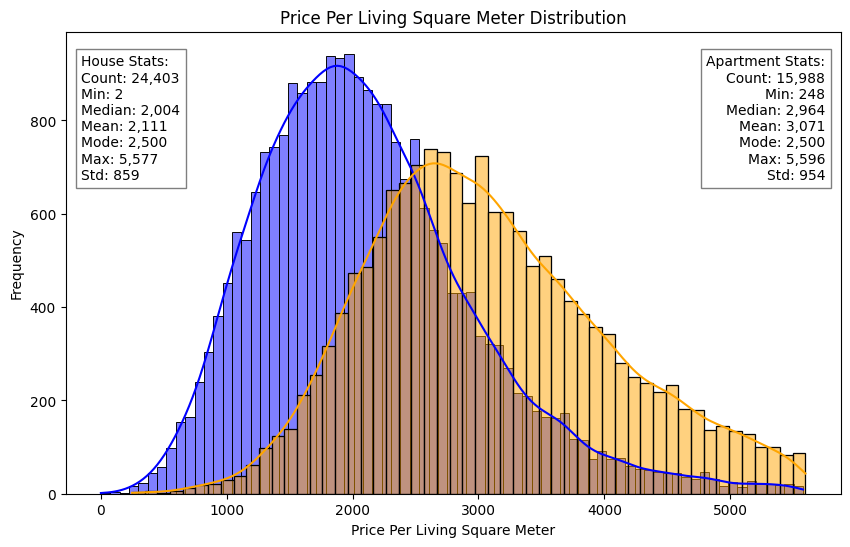

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for house data
house_min = model_house_data['PricePerLivingSquareMeter'].min()
house_median = model_house_data['PricePerLivingSquareMeter'].median()
house_mean = model_house_data['PricePerLivingSquareMeter'].mean()
house_mode = model_house_data['PricePerLivingSquareMeter'].mode()[0]
house_max = model_house_data['PricePerLivingSquareMeter'].max()
house_std = model_house_data['PricePerLivingSquareMeter'].std()
house_count = model_house_data['PricePerLivingSquareMeter'].count()

# Calculate statistics for apartment data
apartment_min = model_apartment_data['PricePerLivingSquareMeter'].min()
apartment_median = model_apartment_data['PricePerLivingSquareMeter'].median()
apartment_mean = model_apartment_data['PricePerLivingSquareMeter'].mean()
apartment_mode = model_apartment_data['PricePerLivingSquareMeter'].mode()[0]
apartment_max = model_apartment_data['PricePerLivingSquareMeter'].max()
apartment_std = model_apartment_data['PricePerLivingSquareMeter'].std()
apartment_count = model_apartment_data['PricePerLivingSquareMeter'].count()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histograms for house and apartment data
plt.figure(figsize=(10, 6))
sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text boxes for house and apartment statistics
plt.text(0.02, 0.95, f'House Stats:\nCount: {format_number(house_count)}\nMin: {format_number(house_min)}\nMedian: {format_number(house_median)}\nMean: {format_number(house_mean)}\nMode: {format_number(house_mode)}\nMax: {format_number(house_max)}\nStd: {format_number(house_std)}',
         horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.98, 0.95, f'Apartment Stats:\nCount: {format_number(apartment_count)}\nMin: {format_number(apartment_min)}\nMedian: {format_number(apartment_median)}\nMean: {format_number(apartment_mean)}\nMode: {format_number(apartment_mode)}\nMax: {format_number(apartment_max)}\nStd: {format_number(apartment_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Per Living Square Meter Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()


By splitting the price data into Home and Apartment we can see two separate normal distribution curves appear. They're still a bit right shifted, so let's explore more sub categories. Check what attributes are related to each other with a correlation matrix. 

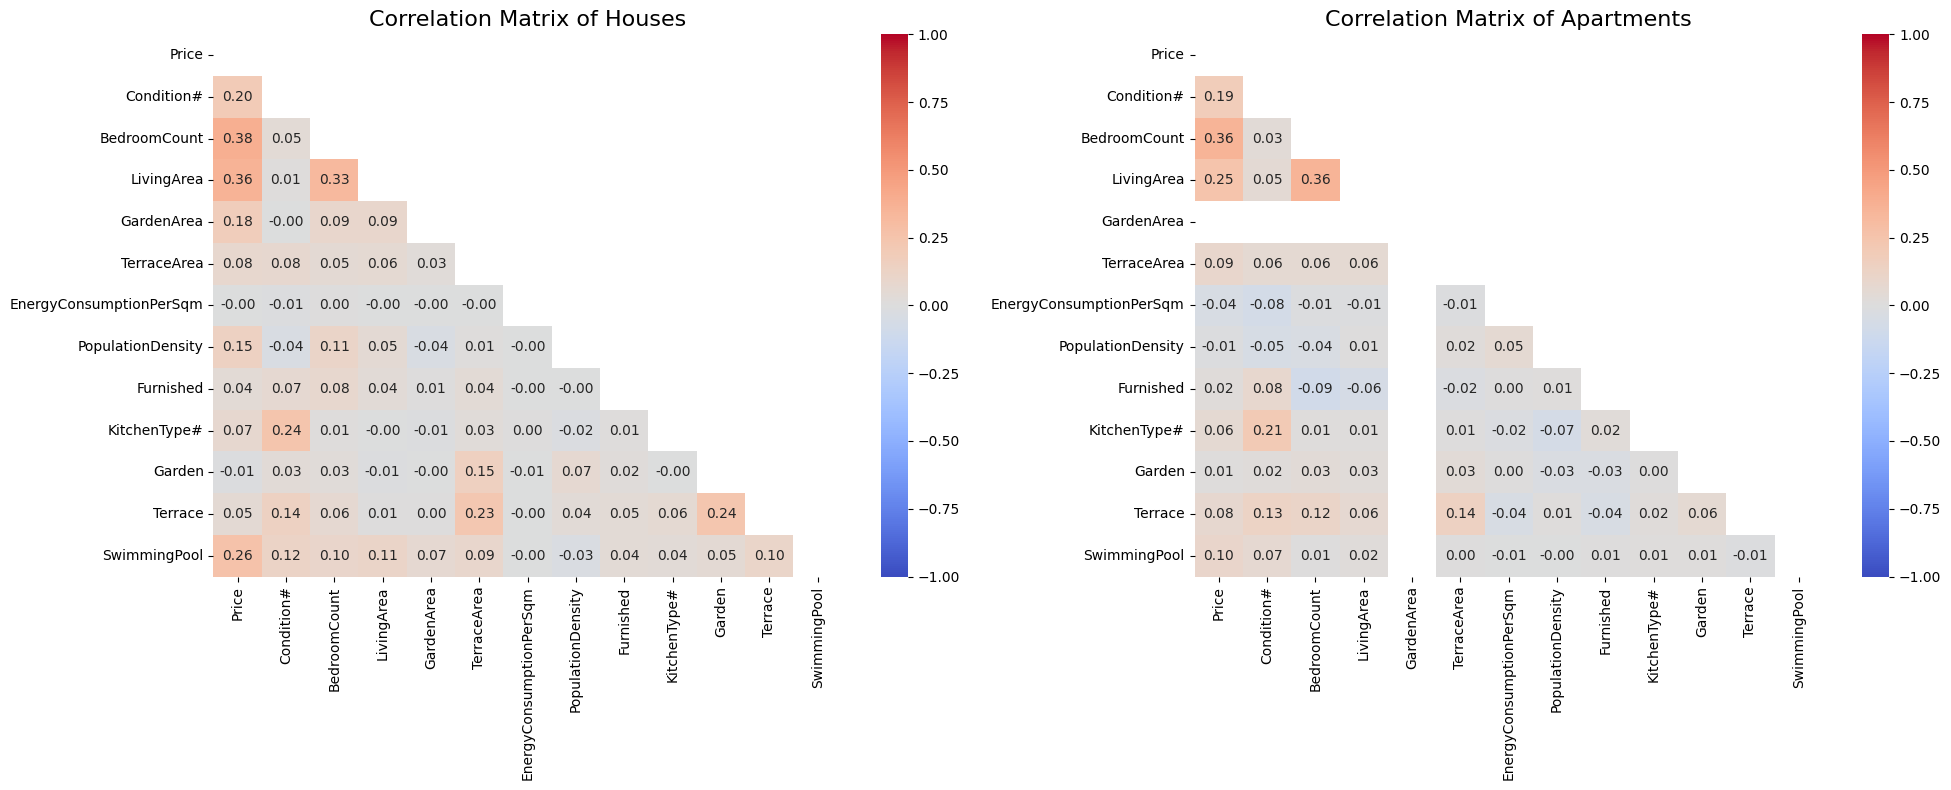

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'Condition#', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'PopulationDensity', 'Furnished', 'KitchenType#', 'Garden', 'Terrace', 'SwimmingPool']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = cleaned_data[cleaned_data['PropertyType'] == 'House'][columns_to_include]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = cleaned_data[cleaned_data['PropertyType'] == 'Apartment'][columns_to_include]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

The correlations aren't very strong, but perhaps that has something to do with the extreme outliers. Check again with the model_data dataframe.

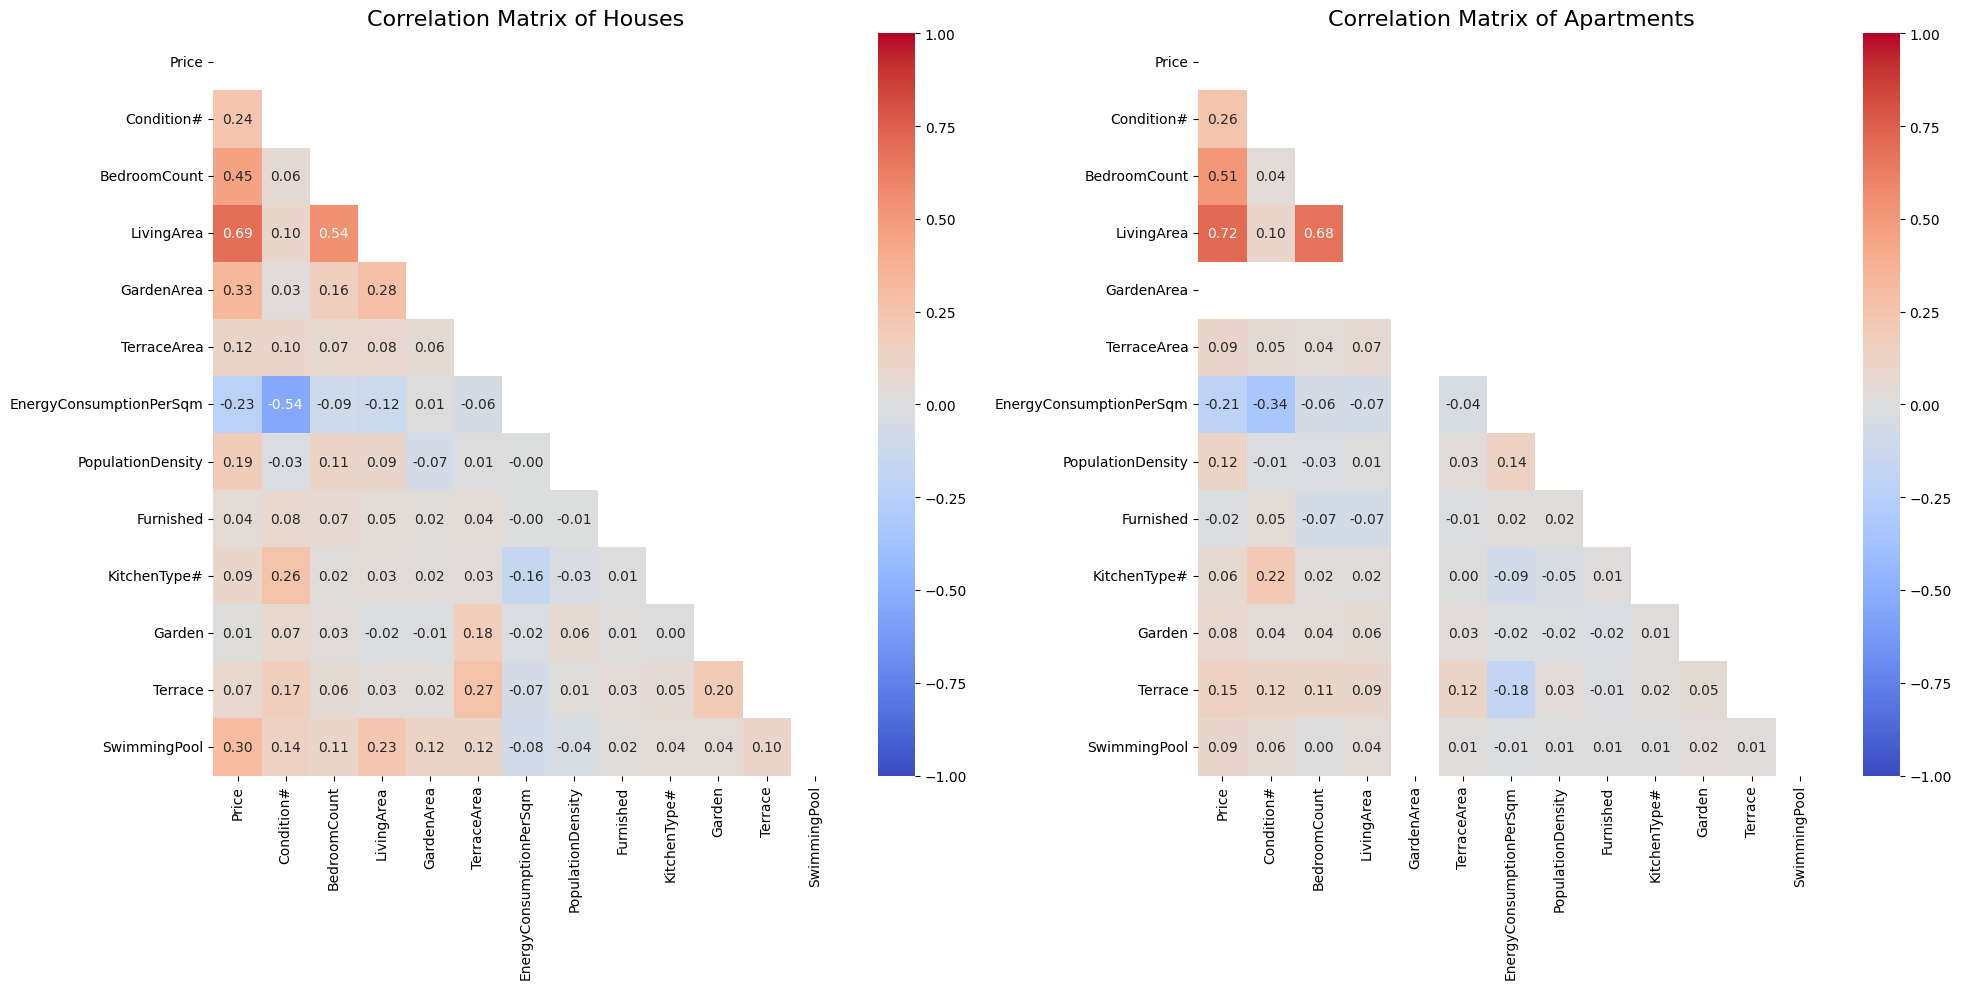

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'Condition#', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'PopulationDensity', 'Furnished', 'KitchenType#', 'Garden', 'Terrace', 'SwimmingPool']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = model_data[model_data['PropertyType'] == 'House'][columns_to_include]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = model_data[model_data['PropertyType'] == 'Apartment'][columns_to_include]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

Now we see the attributes most correlated with price: LivingArea, BedroomCount, Condition#, and EnergyConsumption. Both also have a mild positive relationship to population density, where house has a positive relationship to pools and apartments to terrace. Let's keep checking the other categorical values against price.

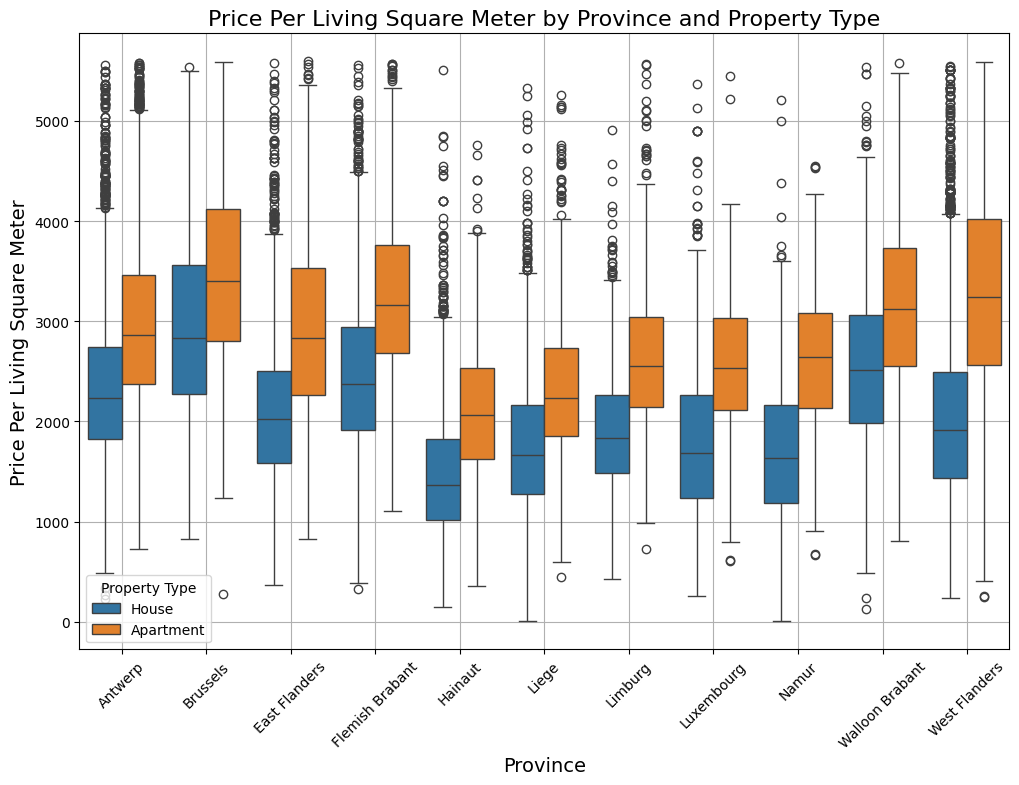

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique provinces and sort alphabetically
provinces = sorted(model_data['Province'].unique())

# Create a box plot with provinces sorted alphabetically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='PricePerLivingSquareMeter', hue='PropertyType', data=model_data, order=provinces)
plt.title('Price Per Living Square Meter by Province and Property Type', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Price Per Living Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

Clearly location has an effect on the price per square meter as well. Brussels 

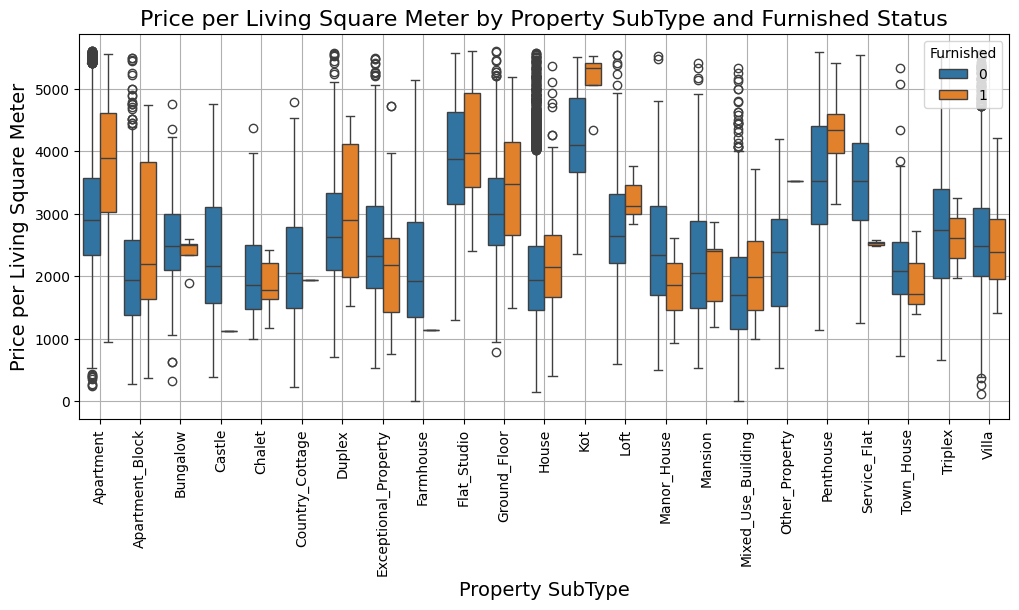

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Create a box plot with hue based on Furnished column
plt.figure(figsize=(12, 5))
sns.boxplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', hue='Furnished')
plt.title('Price per Living Square Meter by Property SubType and Furnished Status', fontsize=16)
plt.xlabel('Property SubType', fontsize=14)
plt.ylabel('Price per Living Square Meter', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='Furnished', loc='upper right')
plt.grid(True)
plt.show()

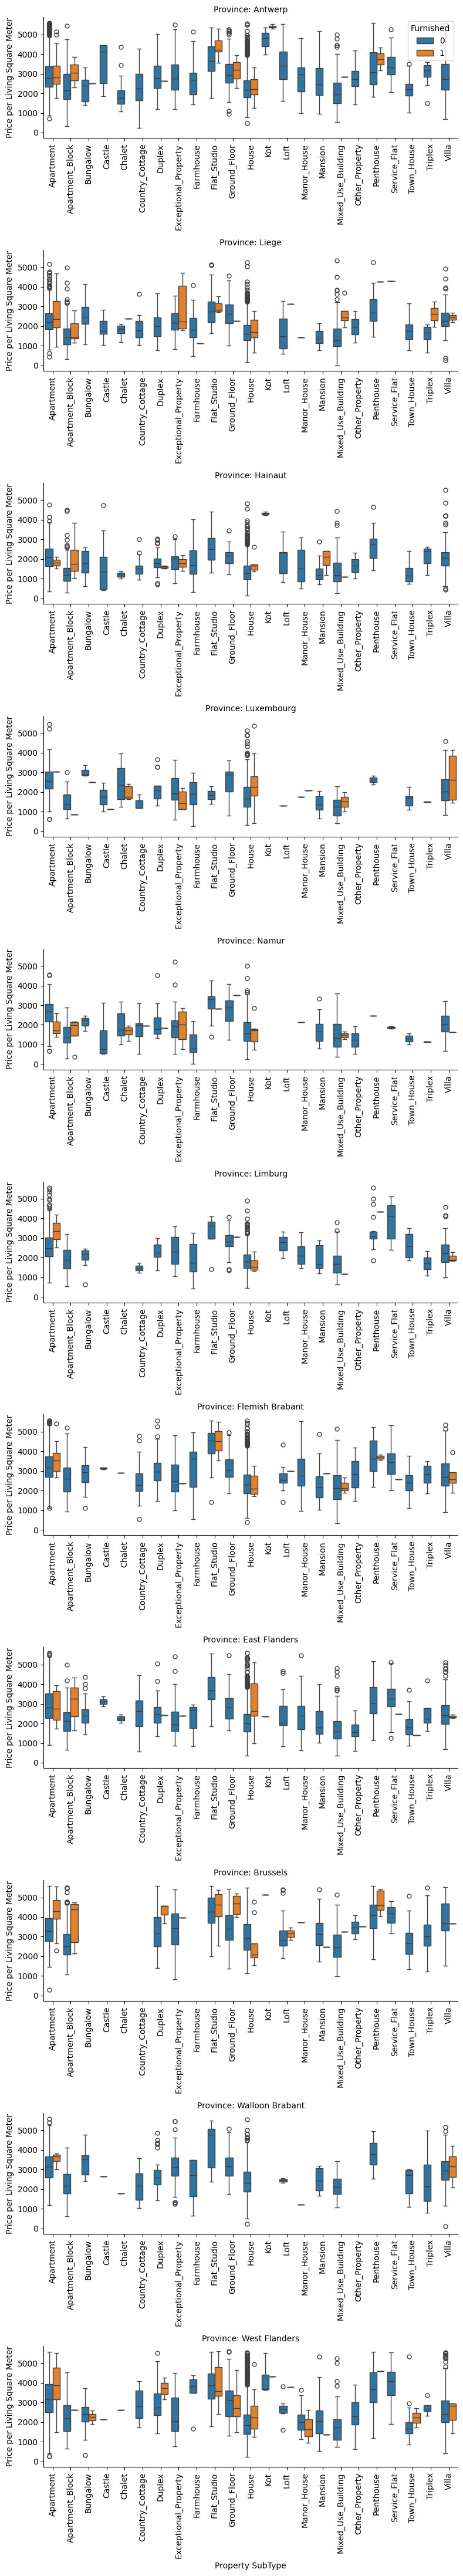

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Get the sorted order of PropertySubType
sorted_subtype_order = model_data_sorted['PropertySubType'].unique()

# Create a box plot with hue based on Furnished column
g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', hue='Furnished',
                col='Province', col_wrap=1, kind='box', height=4, aspect=2,
                legend_out=False, sharex=False, order=sorted_subtype_order)

g.set_titles("Province: {col_name}")
g.set_axis_labels('Property SubType', 'Price per Living Square Meter')
g.set_xticklabels(rotation=90)  # Rotate x-axis labels vertically
g.add_legend(title='Furnished', loc='upper right')
plt.tight_layout()
plt.show()

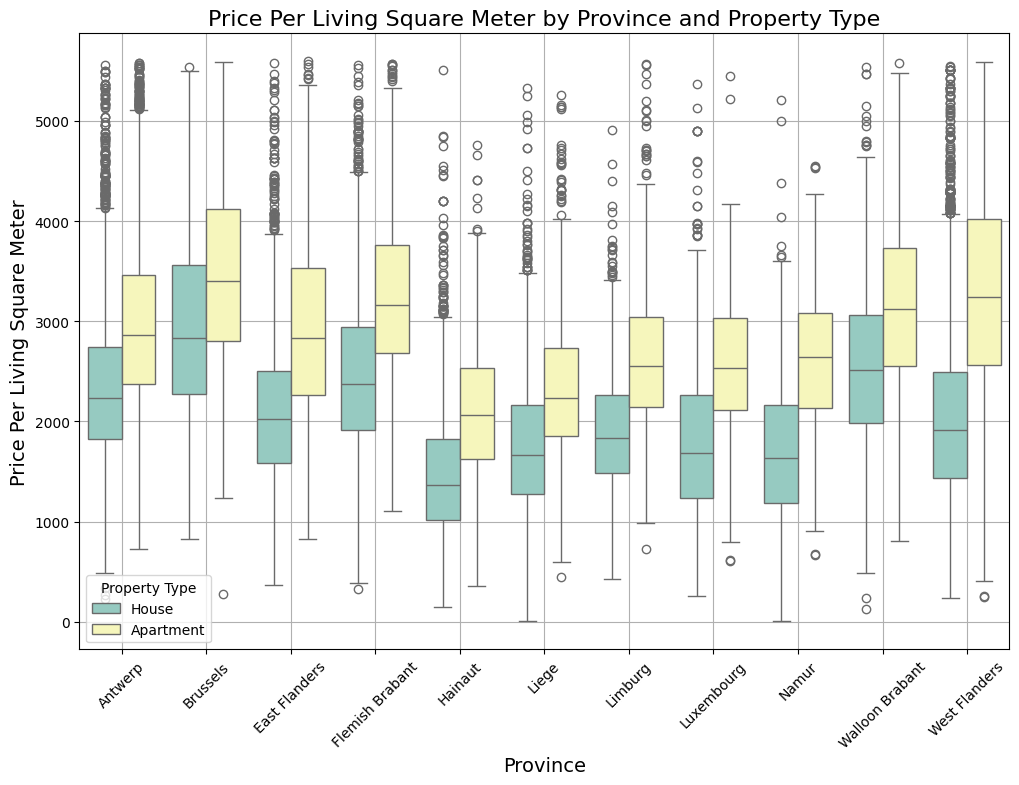

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique provinces and sort alphabetically
provinces = sorted(model_data['Province'].unique())

# Create a box plot with provinces sorted alphabetically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='PricePerLivingSquareMeter', hue='PropertyType', data=model_data, palette='Set3', order=provinces)
plt.title('Price Per Living Square Meter by Province and Property Type', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Price Per Living Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

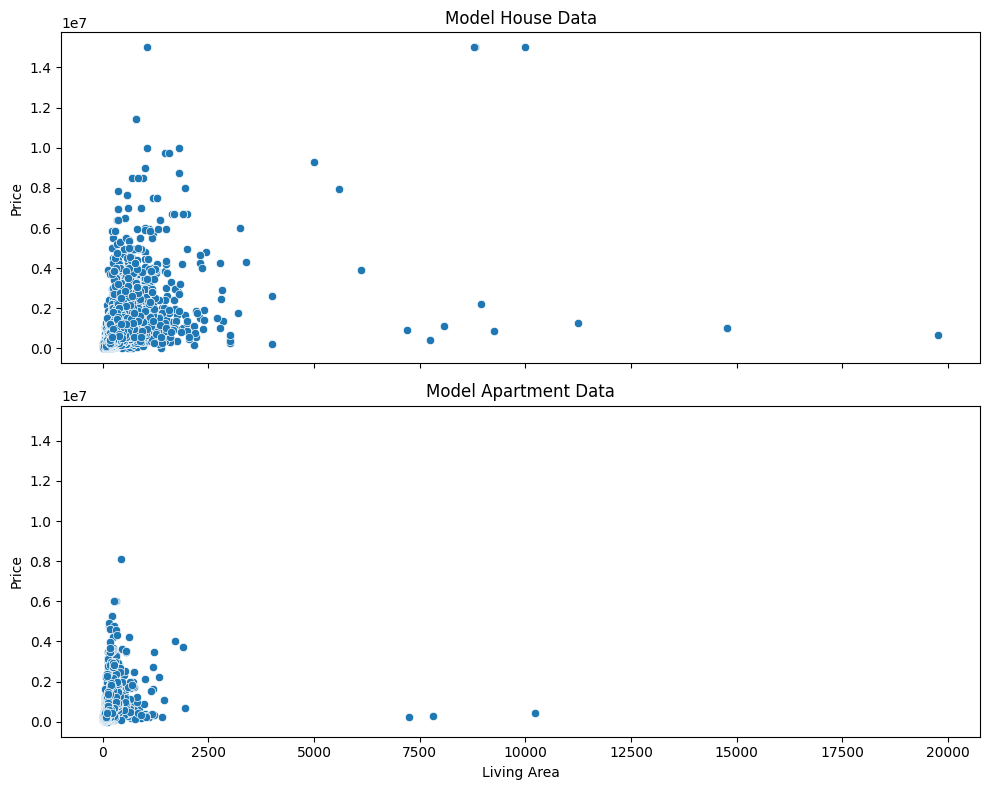

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data
sns.scatterplot(data=clean_house_data, x='LivingArea', y='Price', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=clean_apartment_data, x='LivingArea', y='Price', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

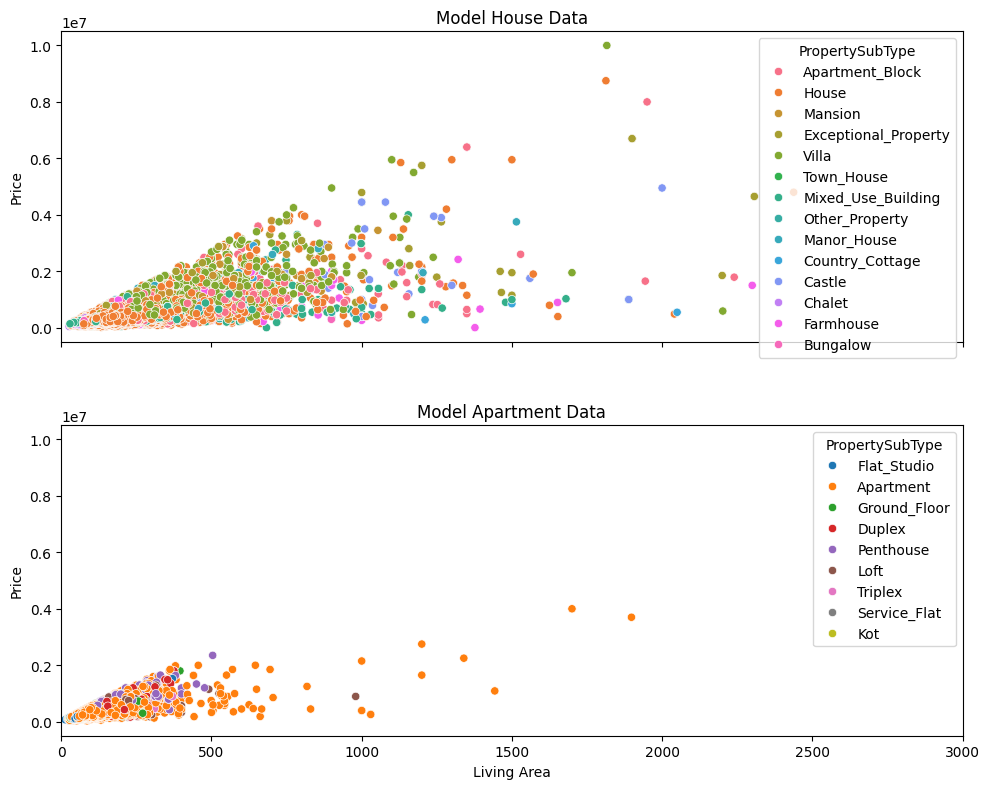

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data with color hue based on PropertySubType
sns.scatterplot(data=model_house_data[model_house_data['LivingArea'] < 3000], 
                x='LivingArea', y='Price', hue='PropertySubType', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')
axes[0].set_xlim(0, 3000)  # Limit x-axis to 0-3000

# Plot scatterplot for model_apartment_data with color hue based on PropertySubType
sns.scatterplot(data=model_apartment_data[model_apartment_data['LivingArea'] < 3000], 
                x='LivingArea', y='Price', hue='PropertySubType', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')
axes[1].set_xlim(0, 3000)  # Limit x-axis to 0-3000

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

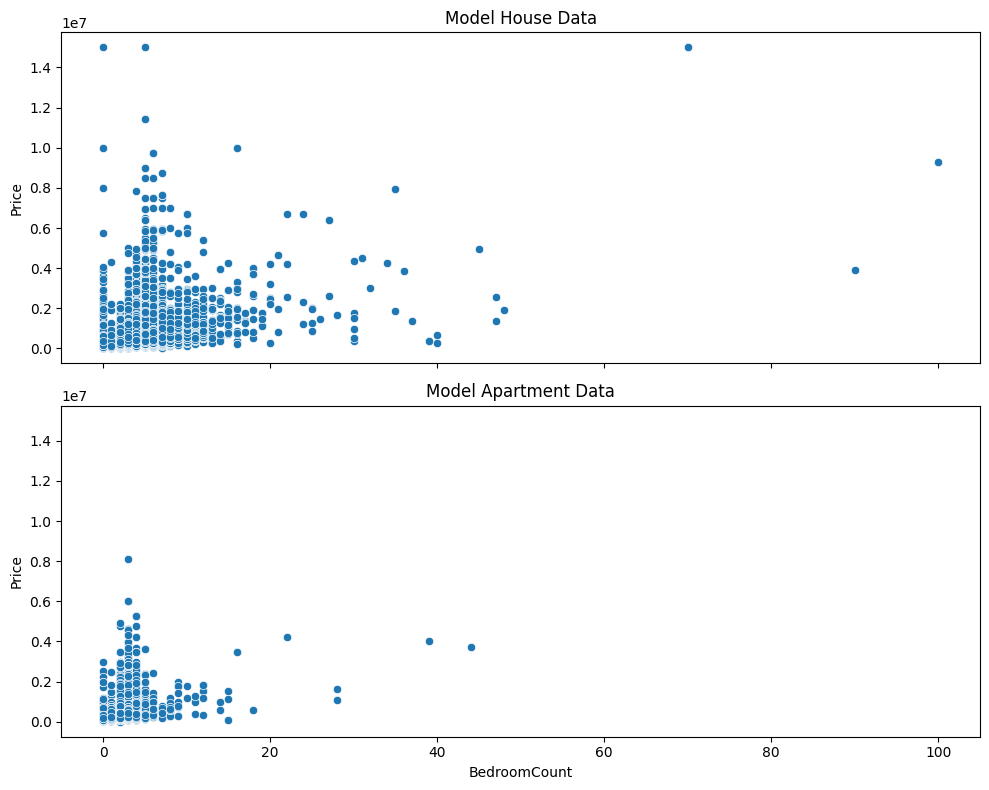

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data
sns.scatterplot(data=clean_house_data, x='BedroomCount', y='Price', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('BedroomCount')
axes[0].set_ylabel('Price')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=clean_apartment_data, x='BedroomCount', y='Price', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('BedroomCount')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='EnergyConsumptionPerSqm', ylabel='PricePerLivingSquareMeter'>

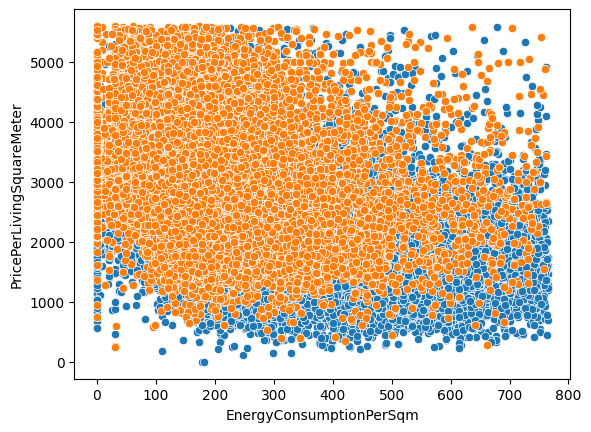

In [26]:
sns.scatterplot(data=model_house_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')
sns.scatterplot(data=model_apartment_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')

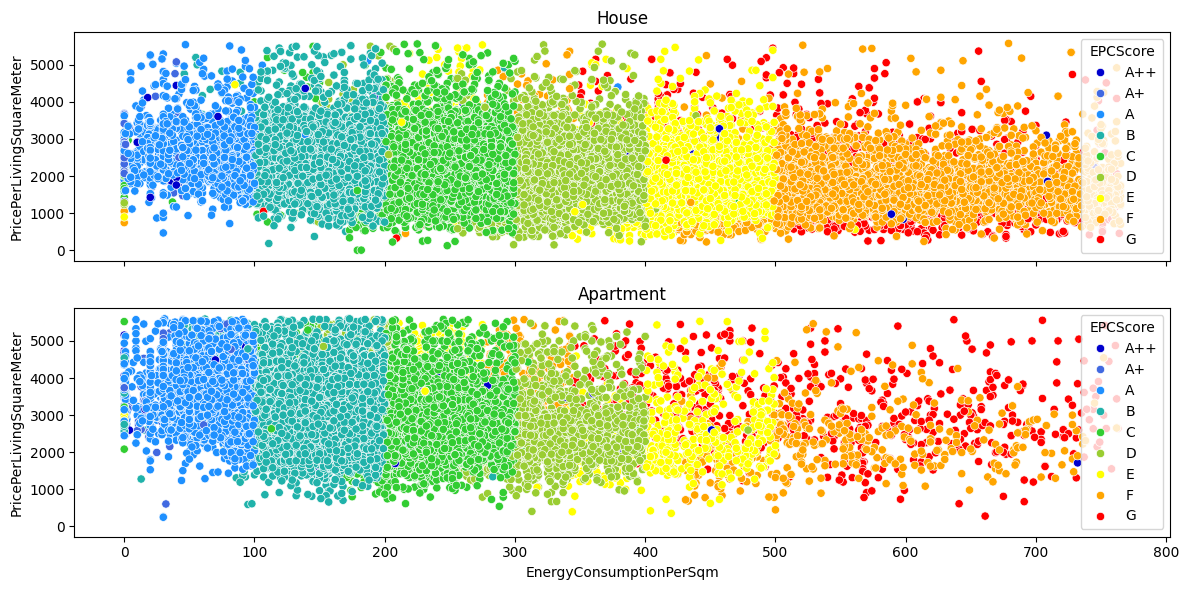

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'G': 'red',     # G: red
    'F': 'orange',  # F: orange
    'E': 'yellow',  # E: yellow
    'D': 'yellowgreen',  # D: yellow-green
    'C': 'limegreen',    # C: green
    'B': 'lightseagreen',  # B: light blue-green
    'A': 'dodgerblue',  # A: blue
    'A+': 'royalblue',  # A+: dark blue
    'A++': 'mediumblue', # A++: medium blue
}

# Define custom order for EPCScore legend
epc_score_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

# Scatter plot for PropertyType == House
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_house_data, ax=axs[0])
axs[0].set_title('House')

# Scatter plot for PropertyType == Apartment
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_apartment_data, ax=axs[1])
axs[1].set_title('Apartment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


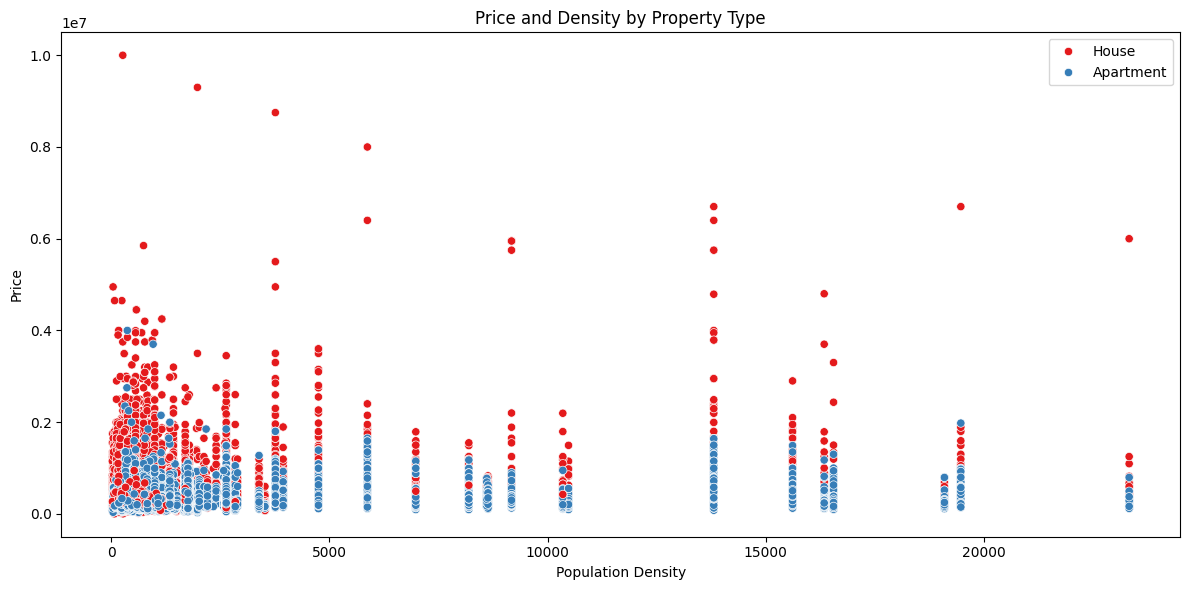

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=model_data, x='PopulationDensity', y='Price', hue='PropertyType', palette='Set1')

# Set title and labels
plt.title('Price and Density by Property Type')
plt.xlabel('Population Density')
plt.ylabel('Price')

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

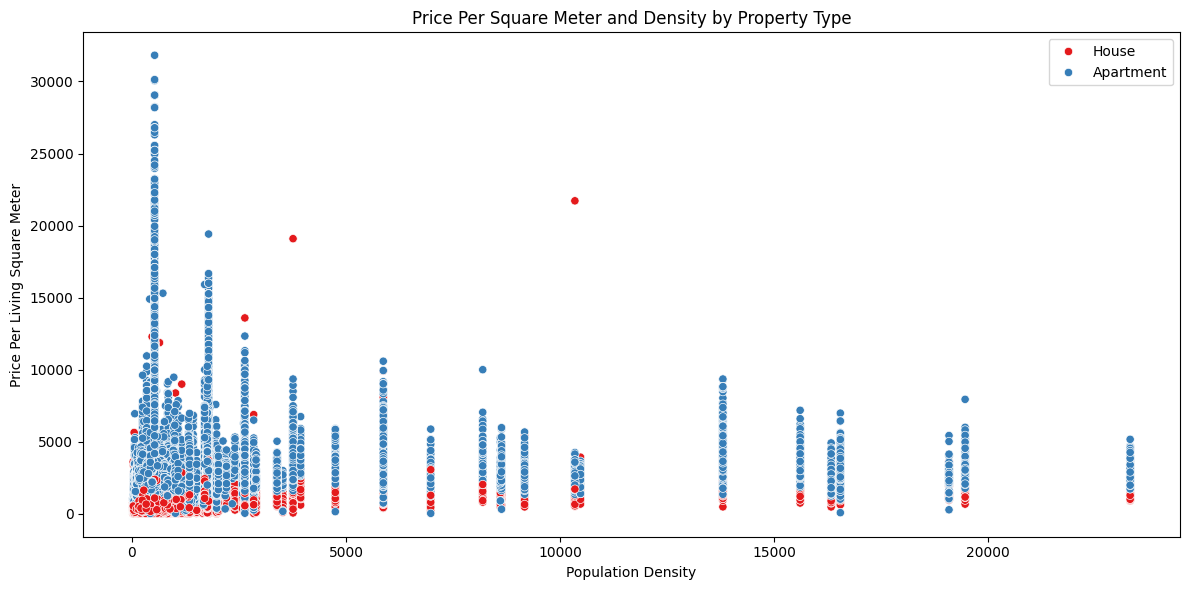

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='PopulationDensity', y='PricePerTotalSquareMeter', hue='PropertyType', palette='Set1')

# Set title and labels
plt.title('Price Per Square Meter and Density by Property Type')
plt.xlabel('Population Density')
plt.ylabel('Price Per Living Square Meter')

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
